<a href="https://colab.research.google.com/github/chiaravanin/CursoCoder/blob/main/ProyectoDS_PArteIVANIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROYECTO DATA SCIENCE - PARTE I

✅**ABSTRACT:**
Este proyecto analiza un dataset de clientes de una entidad bancaria argentina que incluye variables sociodemográficas (edad, género, provincia), productos contratados (tarjetas, seguros, cuentas, plazos fijos), nivel de digitalización y comportamiento de uso.

El objetivo es identificar patrones de comportamiento y segmentación que permitan a la institución mejorar su estrategia comercial y de retención de clientes, a través de un análisis exploratorio de datos (EDA) con técnicas univariadas, bivariadas y multivariadas.

Se emplearán herramientas de análisis en Python como Pandas, Matplotlib y Seaborn para generar visualizaciones interactivas y detectar relaciones significativas entre variables clave (por ejemplo: edad, producto contratado y uso digital). Además, se busca proponer recomendaciones basadas en insights obtenidos del comportamiento de la cartera.

⁉***Preguntas / Hipótesis de interés***

Distribución y perfil de clientes

¿Cómo se distribuye la cartera según edad, género y provincia?

H1: La mayor proporción de clientes se concentra en rangos etarios intermedios (30-50 años) y en provincias con mayor densidad poblacional.

¿Existen diferencias significativas en la cantidad de productos contratados entre segmentos de edad y género?

H2: Clientes de mayor edad tienden a tener más productos contratados.

Productos bancarios

¿Qué combinaciones de productos son más frecuentes por tipo de cliente?

H3: Los clientes con tarjeta de crédito suelen tener también caja de ahorro en pesos.

Digitalización y uso

¿Qué proporción de clientes utiliza canales digitales y cómo varía según grupo etario y provincia?

H4: Los clientes jóvenes presentan mayor adopción de canales digitales que los mayores.

¿Existe relación entre la digitalización y la cantidad de productos contratados?

H5: A mayor adopción digital, mayor contratación de productos.

**DESARROLLO**

In [3]:
from google.colab import drive

In [4]:
import pandas as pd


In [5]:
# 1. Montar Drive en /content/drive
drive.mount('/content/drive')

Mounted at /content/drive


Mi Data Frame superaba el limite de tamaño de GitHUb por eso tuve importarlo desde mi google drive: https://drive.google.com/file/d/1x7j27WAgxY57giGgrzIYhOxyy2ryb2pg/view?usp=drive_link

In [6]:
# 2. La ruta del archivo
url = '/content/drive/MyDrive/Coderhouse/DF_ChiaraVanin.csv'

# 3. Leer el CSV con pandas
df = pd.read_csv(url, sep=';')

# 4. Mostrar las primeras filas
df.head(5)

,CANTIDAD_CLIENTES,PROVINCIA,IND_ACTIVO,CANTIDAD_PRODUCTOS,SEGURO,CAJA_SEGURIDAD,CAJA_AHORRO_USD,TJ_CREDITO,PLAZOS_FIJOS,CTA_CTE,CAJA_AHORRO,Rango_Edad_Nuevo,Segmentacion_Carteras,GÉNERO,Segmento_Tarjeta,IND_DIGITAL,ULTIMO_USO,SALDO_DEUDOR
0,1,MENDOZA,Activo,1,No,No,No,No,No,No,Si,Entre 29 y 38 Años,Cartera Haberes,MASCULINO,4 -Internacional,Y,62.0,0.0
1,1,CORDOBA,Activo,6,Si,No,Si,Si,No,Si,Si,Entre 18 y 28 Años,Cartera Haberes,FEMENINO,4 -Internacional,Y,0.0,0.0
2,1,SAN JUAN,Inactivo,2,No,No,No,No,No,No,Si,Entre 59 y 68 Años,Cartera Abierta,MASCULINO,4 -Internacional,Y,153.0,0.0
3,1,SANTA CRUZ,Activo,2,No,No,No,Si,No,No,Si,Entre 39 y 48 Años,Cartera Abierta,MASCULINO,4 -Internacional,Y,28.0,0.0
4,3,CORRIENTES,Activo,2,No,No,No,No,Si,No,Si,Entre 39 y 48 Años,Cartera Previsional,FEMENINO,NaN,N,3.0,0.0


In [7]:
df.shape #Tamaño de mi Data Frame

(1257673, 18)

In [8]:
df.info() #Info de mi Data Frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257673 entries, 0 to 1257672
Data columns (total 18 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   CANTIDAD_CLIENTES      1257673 non-null  int64  
 1   PROVINCIA              1257673 non-null  object 
 2   IND_ACTIVO             1257673 non-null  object 
 3   CANTIDAD_PRODUCTOS     1257673 non-null  int64  
 4   SEGURO                 1257673 non-null  object 
 5   CAJA_SEGURIDAD         1257673 non-null  object 
 6   CAJA_AHORRO_USD        1257673 non-null  object 
 7   TJ_CREDITO             1257673 non-null  object 
 8   PLAZOS_FIJOS           1257673 non-null  object 
 9   CTA_CTE                1257673 non-null  object 
 10  CAJA_AHORRO            1257673 non-null  object 
 11  Rango_Edad_Nuevo       1257673 non-null  object 
 12  Segmentacion_Carteras  1231339 non-null  object 
 13  GÉNERO                 1257662 non-null  object 
 14  Segmento_Tarjeta  

In [9]:
df.isnull().sum() #Chequear en detalle los null para luego manejarlos

,0
CANTIDAD_CLIENTES,0
PROVINCIA,0
IND_ACTIVO,0
CANTIDAD_PRODUCTOS,0
SEGURO,0
CAJA_SEGURIDAD,0
CAJA_AHORRO_USD,0
TJ_CREDITO,0
PLAZOS_FIJOS,0
CTA_CTE,0


**Análisis de Valores Pérdidos (null)** A partir de la info de mi DataFrame puedo identificar las variables que hay valores faltantes:
Segmentacion_Carteras: tiene un 2 % de valores faltantes. Esto es relativamente bajo se imputará con una categoría como “No informado”.

GÉNERO: solo 11 valores faltantes, lo que es  prácticamente insignificante. Se procede a imputar la moda.

Segmento_Tarjeta: 64 % faltantes, probablemente porque la mayoría de los clientes no tienen tarjeta. Los NaN se interpretan como  “sin tarjeta” y se creará una categoría así.

ULTIMO_USO: solo 0.3 % de faltantes, se interpretan como “sin actividad registrada”, se imputa un número representativo -1.

In [10]:
df['Segmentacion_Carteras'] = df['Segmentacion_Carteras'].fillna('No informado')


In [11]:
# Calculo la moda
moda_genero = df['GÉNERO'].mode()[0]

# Imputar moda a valores faltantes
df['GÉNERO'] = df['GÉNERO'].fillna(moda_genero)


In [12]:
df['Segmento_Tarjeta'] = df['Segmento_Tarjeta'].fillna('Sin tarjeta')


In [13]:

# Imputar nulos con -1
df['ULTIMO_USO'] = df['ULTIMO_USO'].fillna(-1)



In [14]:
# Verificación de imputación
df[['Segmentacion_Carteras', 'GÉNERO', 'Segmento_Tarjeta', 'ULTIMO_USO']].info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257673 entries, 0 to 1257672
Data columns (total 4 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Segmentacion_Carteras  1257673 non-null  object 
 1   GÉNERO                 1257673 non-null  object 
 2   Segmento_Tarjeta       1257673 non-null  object 
 3   ULTIMO_USO             1257673 non-null  float64
dtypes: float64(1), object(3)
memory usage: 38.4+ MB


,0
CANTIDAD_CLIENTES,0
PROVINCIA,0
IND_ACTIVO,0
CANTIDAD_PRODUCTOS,0
SEGURO,0
CAJA_SEGURIDAD,0
CAJA_AHORRO_USD,0
TJ_CREDITO,0
PLAZOS_FIJOS,0
CTA_CTE,0


In [15]:
# Detección de outliers en  columnas con datos numéricas (SALDO_DEUDOR, ULTIMO_USO, CANTIDAD_CLIENTES, CANTIDAD_PRODUCTOS) usando el método IQR (interquartile range).

import numpy as np

num_cols = ['SALDO_DEUDOR', 'ULTIMO_USO', 'CANTIDAD_CLIENTES', 'CANTIDAD_PRODUCTOS']

outlier_report = {}

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # Guardar información en el reporte
    outlier_report[col] = {
        'num_outliers': len(outliers),
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

    print(f"{col} - Outliers detectados: {len(outliers)}")


# Mostrar reporte resumido
import pprint
pprint.pprint(outlier_report)

SALDO_DEUDOR - Outliers detectados: 6838
ULTIMO_USO - Outliers detectados: 98952
CANTIDAD_CLIENTES - Outliers detectados: 168769
CANTIDAD_PRODUCTOS - Outliers detectados: 142794
{'CANTIDAD_CLIENTES': {'lower_bound': np.float64(-3.5),
                       'num_outliers': 168769,
                       'upper_bound': np.float64(8.5)},
 'CANTIDAD_PRODUCTOS': {'lower_bound': np.float64(-0.5),
                        'num_outliers': 142794,
                        'upper_bound': np.float64(3.5)},
 'SALDO_DEUDOR': {'lower_bound': np.float64(0.0),
                  'num_outliers': 6838,
                  'upper_bound': np.float64(0.0)},
 'ULTIMO_USO': {'lower_bound': np.float64(-884.0),
                'num_outliers': 98952,
                'upper_bound': np.float64(1508.0)}}


A partir de este análisis de detección de outliers puedo ver que  según el método IQR aplicado, ningún valor está extremadamente fuera del rango estadístico. La única variable que tiene un límite negativo muy bajo es  "ULTIMO_USO"  por la imputación -1 a los null, lo cuál se va aclarar mejor creando una nueva columna denominada "SIN_ACTIVIDAD".

In [16]:
# Manejo de casos edge:

# 1) Columnas a revisar
num_cols_negativos = [ 'ULTIMO_USO']

# Crear un diccionario para guardar el reporte
negativos_report = {}

for col in num_cols_negativos:
    # Filtrar registros con valores negativos
    negativos = df[df[col] < 0]

    # Guardar cantidad y algunos ejemplos
    negativos_report[col] = {
        'num_negativos': len(negativos),
        'ejemplos': negativos[col].head(5).tolist()
    }



# Mostrar reporte resumido
import pprint
print("=== Reporte de valores negativos detectados ===")
pprint.pprint(negativos_report)


=== Reporte de valores negativos detectados ===
{'ULTIMO_USO': {'ejemplos': [-1.0, -1.0, -1.0, -1.0, -1.0],
                'num_negativos': 3876}}


In [17]:
# Se detectaron 3.876 valores negativos
# Creación de una columna "Sin_Actividad" donde si trae true corresponde a -1 osea sin actividad


# Reemplazar valores negativos por -1
df['ULTIMO_USO'] = df['ULTIMO_USO'].apply(lambda x: x if x >= 0 else -1)

# Agregar columna indicadora "sin actividad" si es -1
df['Sin_Actividad'] = df['ULTIMO_USO'] == -1


# Verificar cambios
print(df[['ULTIMO_USO', 'Sin_Actividad']].head(10))
print("Cantidad de valores faltantes:", df['ULTIMO_USO'].isna().sum())

   ULTIMO_USO  Sin_Actividad
0        62.0          False
1         0.0          False
2       153.0          False
3        28.0          False
4         3.0          False
5        16.0          False
6       303.0          False
7         1.0          False
8         0.0          False
9       660.0          False
Cantidad de valores faltantes: 0


In [18]:
# Corregir otra inconsistencia en datos
import pandas as pd

df['TJ_CREDITO'] = df['Segmento_Tarjeta'].apply(lambda x: 'Si' if pd.notna(x) and x != '' else 'No')


**Primer Hipotesis a resolver: ¿Cómo se distribuye la cartera según edad, género y provincia?**
H1: La mayor proporción de clientes se concentra en rangos etarios intermedios (30-50 años) y en provincias con mayor densidad poblacional.

In [19]:
# Resumen Estadistico

# Clientes por edad
edad_sum = df.groupby('Rango_Edad_Nuevo')['CANTIDAD_CLIENTES'].sum().sort_index()
print(edad_sum)


# Clientes por género
genero_sum = df.groupby('GÉNERO')['CANTIDAD_CLIENTES'].sum()
print(genero_sum)


# Clientes por provincia
provincia_sum = df.groupby('PROVINCIA')['CANTIDAD_CLIENTES'].sum().sort_values(ascending=False)
print(provincia_sum.head(10))  # Top 10 provincias


Rango_Edad_Nuevo
Entre 18 y 28 Años    3202745
Entre 29 y 38 Años    2810631
Entre 39 y 48 Años    2257318
Entre 49 y 58 Años    1504006
Entre 59 y 68 Años    1196076
Mayor a 69 Años       1156685
Menor a 18             152110
Name: CANTIDAD_CLIENTES, dtype: int64
GÉNERO
FEMENINO     6686104
MASCULINO    5592891
X                576
Name: CANTIDAD_CLIENTES, dtype: int64
PROVINCIA
BUENOS AIRES       3833550
CORDOBA             971952
CAPITAL FEDERAL     894459
MENDOZA             879424
SANTA FE            851840
TUCUMAN             575221
CHACO               427862
MISIONES            398144
ENTRE RIOS          371114
SALTA               348370
Name: CANTIDAD_CLIENTES, dtype: int64


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

♀ ♂ Visualización de la Distribución de Clientes por Género


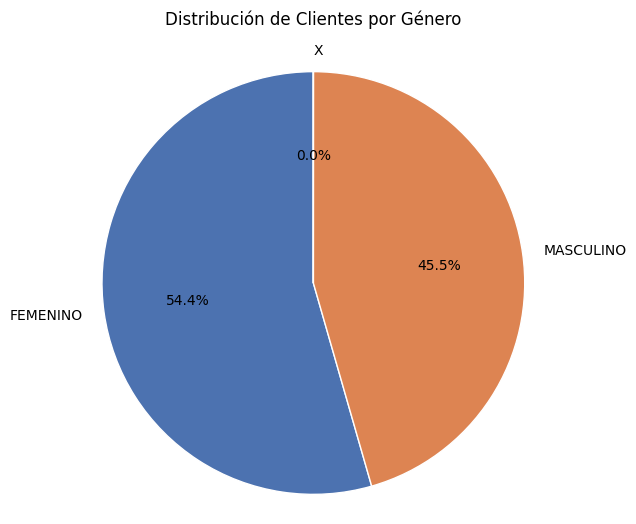

In [21]:
import matplotlib.pyplot as plt #importo para visualizaciones
colors = sns.color_palette('deep')
df_genero = df.groupby('GÉNERO')['CANTIDAD_CLIENTES'].sum()
plt.figure(figsize=(6,6))
plt.pie(
    df_genero,
    labels=df_genero.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'w'}
)
plt.title("Distribución de Clientes por Género", pad=20)
plt.axis('equal')

plt.show()



Conclusión respecto al género: la distribución de clientes es bastante equitativa entre mujeres y hombres, pero predomina el género femenino. Por otro lado  hay un porcentaje que no llega al 1% que no se identifica con los géneros tradicionales.

☑  La edad de los clientes bancarizados

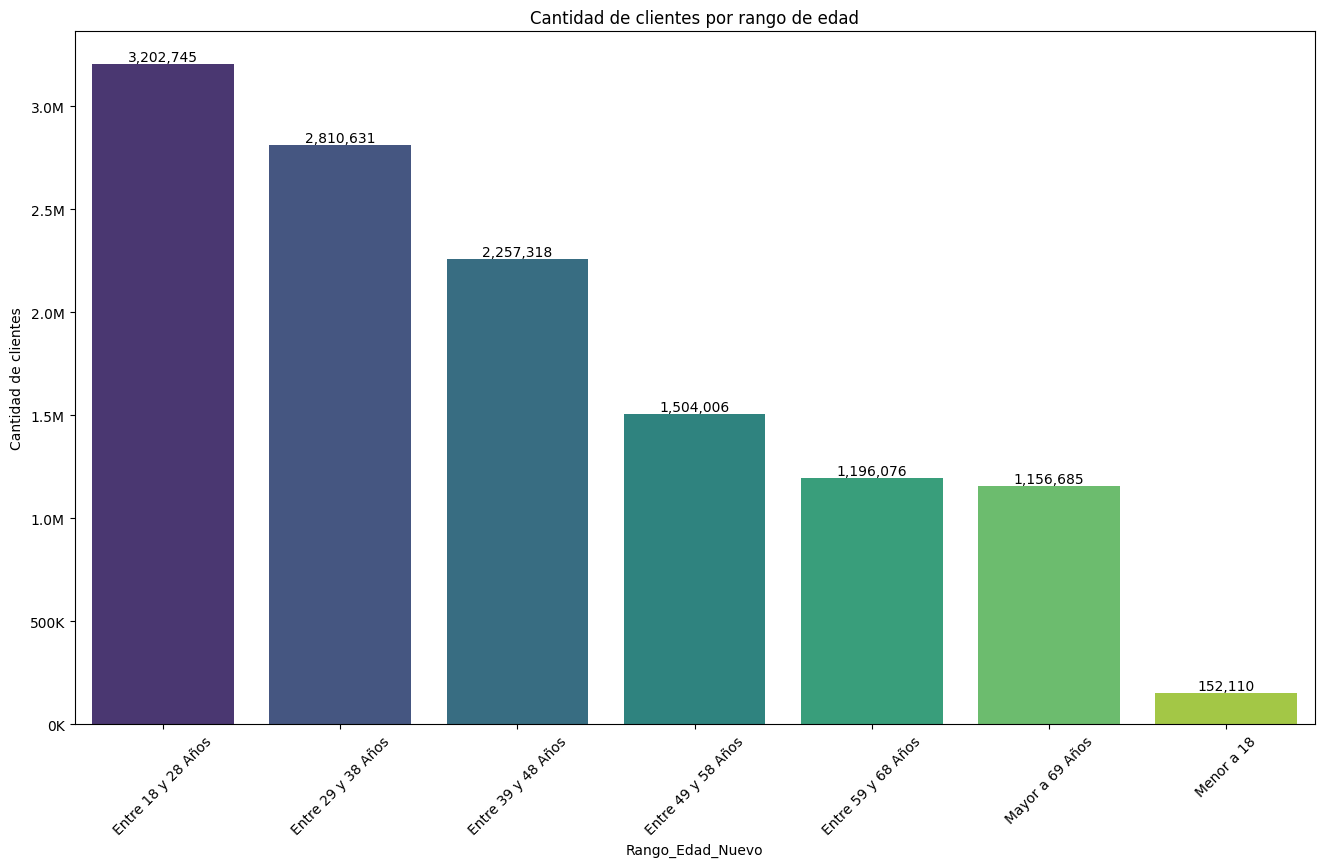

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

df_edad = df.groupby('Rango_Edad_Nuevo')['CANTIDAD_CLIENTES'].sum().reset_index()
orden_rangos = df_edad.sort_values('Rango_Edad_Nuevo')['Rango_Edad_Nuevo']


plt.figure(figsize=(16,9))
ax= sns.barplot(x='Rango_Edad_Nuevo', y='CANTIDAD_CLIENTES', hue= 'Rango_Edad_Nuevo', data=df_edad, order=orden_rangos, palette= 'viridis')
plt.title('Cantidad de clientes por rango de edad')
plt.ylabel('Cantidad de clientes')

from matplotlib.ticker import FuncFormatter  #lo importe para luego poder corregir la unidad del eje y
def formato_miles(x, pos):
    if x >= 1_000_000:
        return f'{x*1e-6:.1f}M'  # millones con 1 decimal
    else:
        return f'{x*1e-3:.0f}K'  # miles sin decimales

ax.yaxis.set_major_formatter(FuncFormatter(formato_miles))

for p in ax.patches:
    ax.annotate(
        format(int(p.get_height()), ',d'),  # pasar a numero a entero
        (p.get_x() + p.get_width() / 2., p.get_height()),  # posición sobre la barra
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )


plt.xticks(rotation=45)
plt.show()


↪ Los jóvenes adultos (18 a 38 años) representan casi la mitad de la cartera, con un gran potencial de vinculación digital

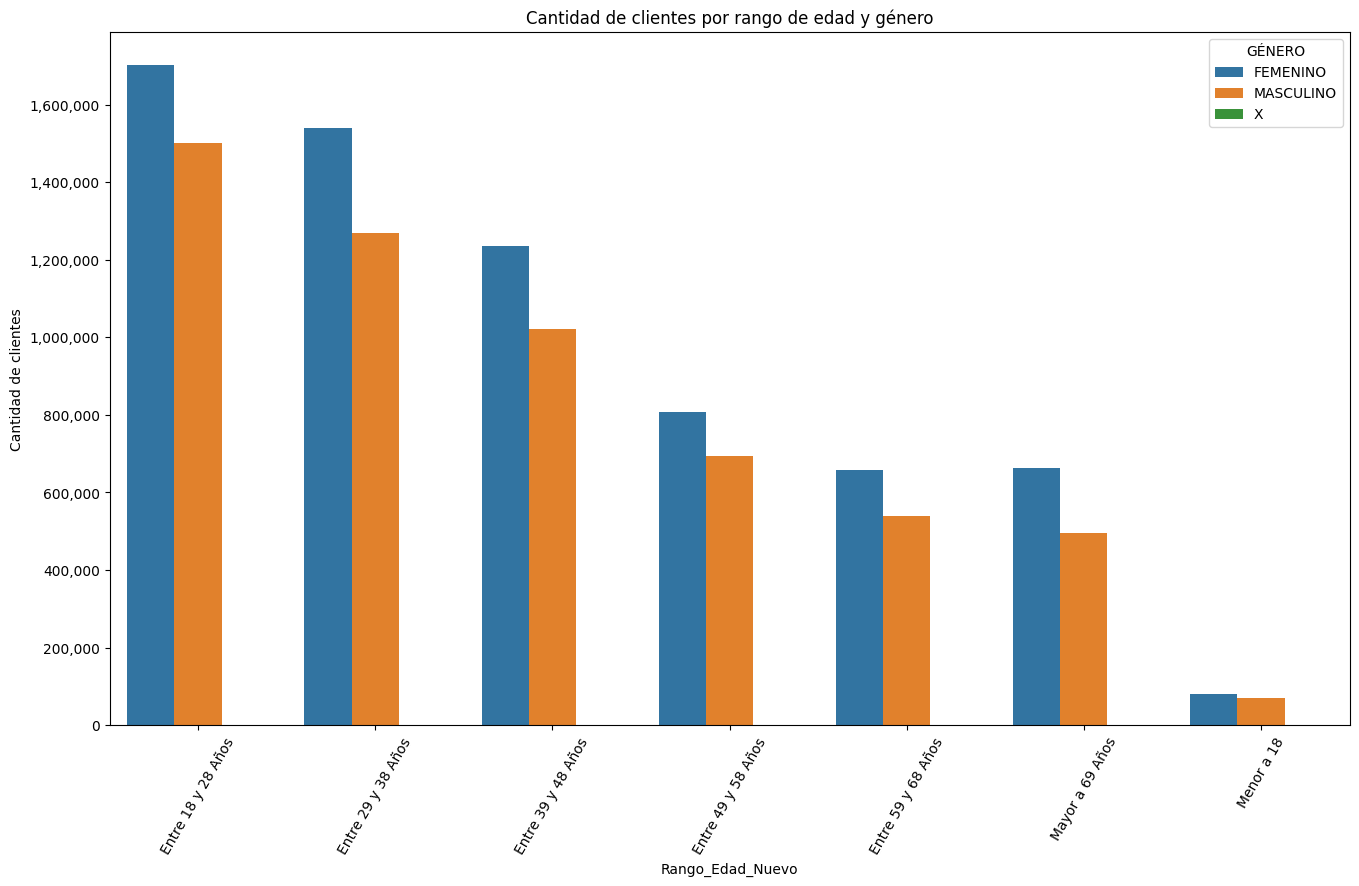

In [27]:
# Visualización Multivariada: Clientes por edad vs género
edad_genero_sum = df.groupby(['Rango_Edad_Nuevo','GÉNERO'])['CANTIDAD_CLIENTES'].sum().reset_index()

plt.figure(figsize=(16,9))
sns.barplot(data=edad_genero_sum, x='Rango_Edad_Nuevo', y='CANTIDAD_CLIENTES', hue='GÉNERO')
# Formato del eje Y con separador de miles
formatter = FuncFormatter(lambda x, p: format(int(x), ','))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title('Cantidad de clientes por rango de edad y género')
plt.xticks(rotation=60)
plt.ylabel('Cantidad de clientes')
plt.show()


**Respuesta a H1** es cierto que la mayor proporción de clientes se concentra en rangos etarios intermedios (30-50 años). Pero mayoritarimente en rangos etarios más jóvenes.

Top 10 - Provincias con mas clientes

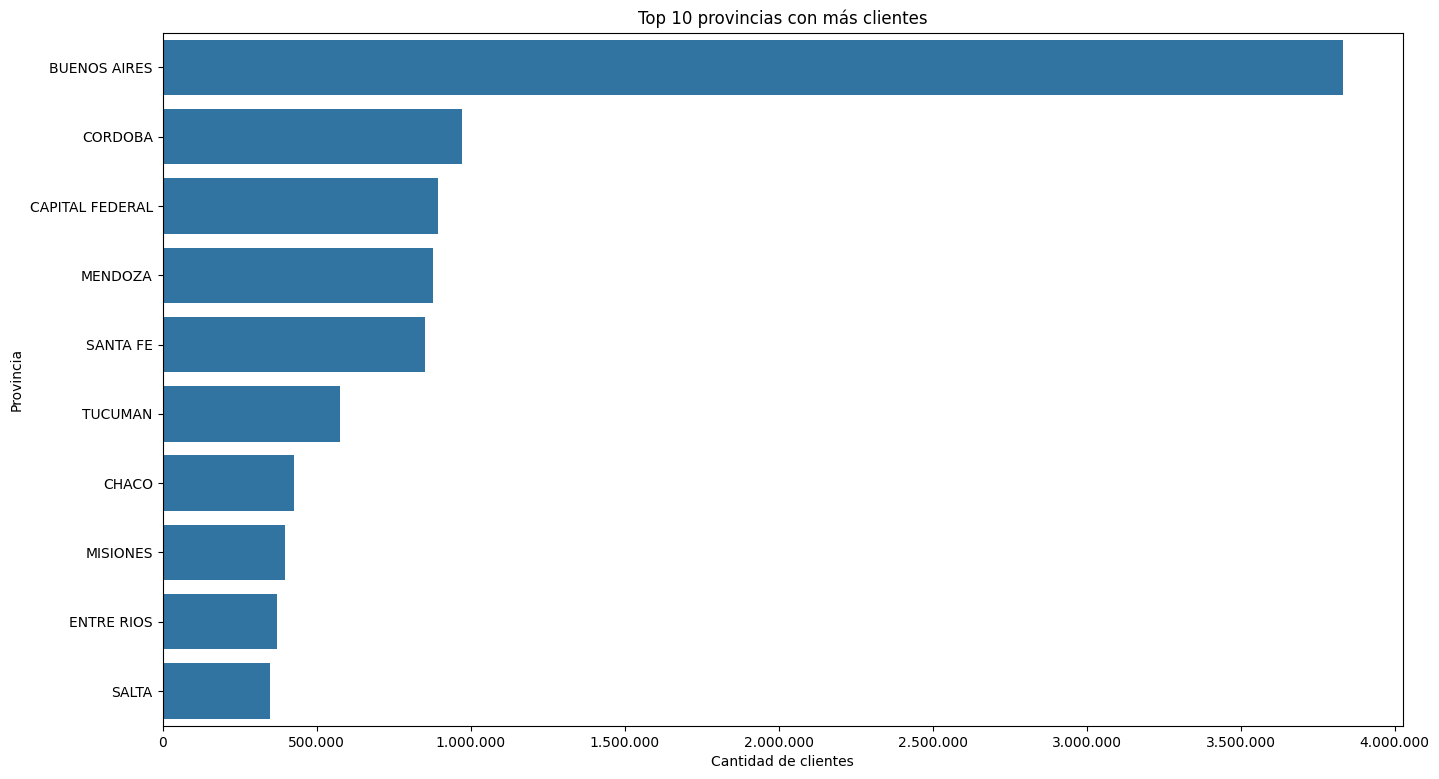

In [34]:
plt.figure(figsize=(16,9))
sns.barplot(x=provincia_sum.head(10).values, y=provincia_sum.head(10).index)

formatter = FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.'))
plt.gca().xaxis.set_major_formatter(formatter)
plt.title('Top 10 provincias con más clientes')
plt.xlabel('Cantidad de clientes')
plt.ylabel('Provincia')
plt.show()

**Respuesta H1** La mayor concentración de clientes se encuentra en las provincias con mayor densidad poblacional, encabezadas por Buenos Aires, Córdoba y Capital Federal. Esto indica que la distribución geográfica de la cartera refleja la concentración demográfica del país.

Ademas de ver como se compone la cartera del Top 10 de Provincias, se puede analizar la actividad de esos clientes.

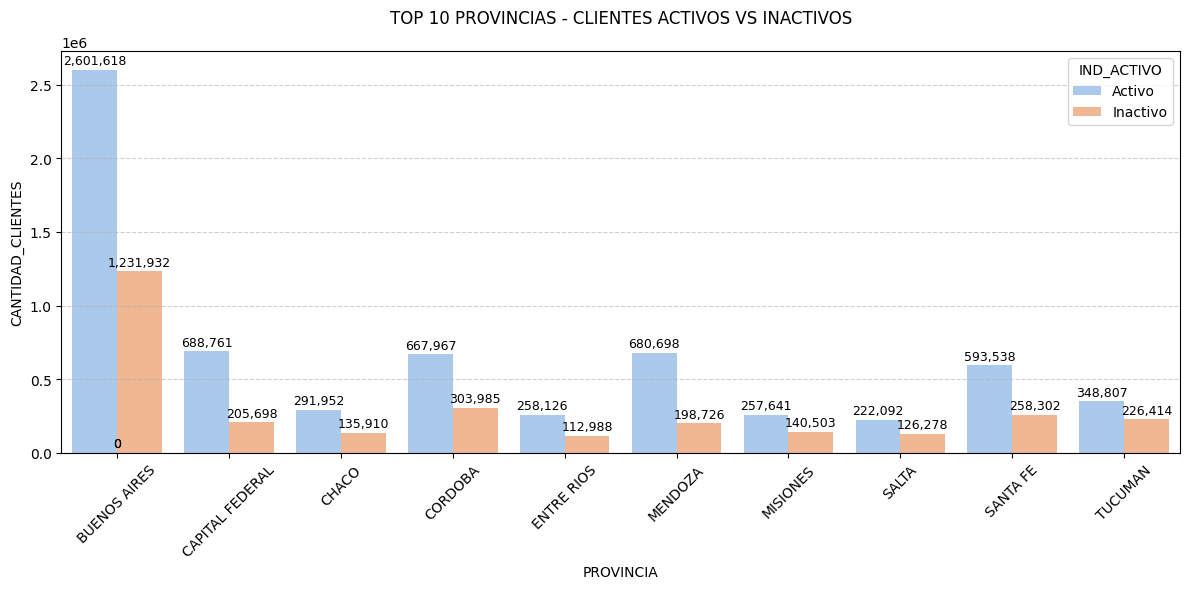

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Top 10 provincias por cantidad de clientes
top_provincias = df.groupby('PROVINCIA')['CANTIDAD_CLIENTES'].sum().nlargest(10).index
df_top = df[df['PROVINCIA'].isin(top_provincias)]

# Agrupar por provincia y estado activo sumando clientes
provincia_estado = (
    df_top.groupby(['PROVINCIA', 'IND_ACTIVO'])['CANTIDAD_CLIENTES']
    .sum()
    .reset_index()
)

# Gráfico de barras agrupadas
plt.figure(figsize=(12, 6))
ax = sns.barplot(
    data=provincia_estado,
    x='PROVINCIA',
    y='CANTIDAD_CLIENTES',
    hue='IND_ACTIVO',
    palette='pastel'
)

plt.title('TOP 10 PROVINCIAS - CLIENTES ACTIVOS VS INACTIVOS', pad=20)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Etiquetas de valores encima de las barras
for p in ax.patches:
    ax.annotate(
        format(int(p.get_height()), ',d'),
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=9,
        color='black',
        xytext=(0, 2),
        textcoords='offset points'
    )

plt.tight_layout()
plt.show()



↪  Como mencione la mayor concentración de clientes se encuentra en Buenos Aires, Capital Federal y Córdoba, lo que refleja la distribución poblacional del país. Sin embargo, se observa que en Buenos Aires existe una proporción significativa de clientes inactivos, lo que representa una oportunidad de estrategia focalizada en reactivación. En provincias como Mendoza y Entre Ríos, la proporción de activos es más alta, lo que podría asociarse con mayor nivel de engagement

**¿Existen diferencias significativas en la cantidad de productos contratados entre segmentos de edad y género?** Segunda Hipótesis a resolver: ¿Clientes de mayor edad tienden a tener más productos contratados?

/tmp/ipython-input-1941143718.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


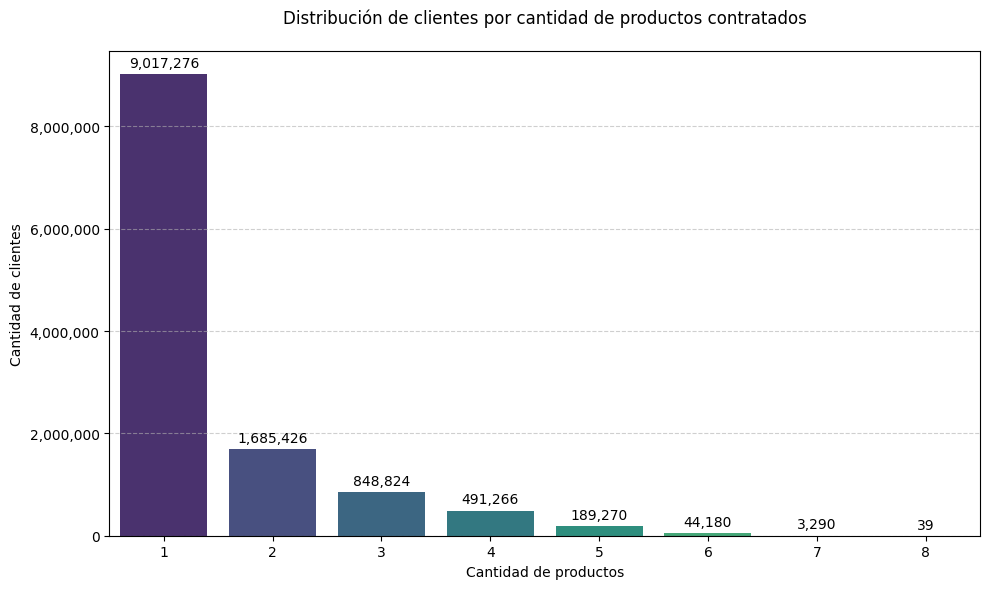

In [ ]:
import matplotlib.ticker as mticker

plt.figure(figsize=(10,6))
ax = sns.barplot(
    data=productos_vs_clientes,
    x='CANTIDAD_PRODUCTOS',
    y='CANTIDAD_CLIENTES',
    palette='viridis'
)
plt.title('Distribución de clientes por cantidad de productos contratados', pad=20)
plt.xlabel('Cantidad de productos')
plt.ylabel('Cantidad de clientes')

# Desactivar notación científica
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# Anotar valores arriba de cada barra
for p in ax.patches:
    ax.annotate(f"{int(p.get_height()):,}",
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=10, xytext=(0, 3),
                textcoords='offset points')

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()




In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Agrupar por Rango_Edad_Nuevo y Cantidad_Productos
edad_producto = df.groupby(['Rango_Edad_Nuevo', 'CANTIDAD_PRODUCTOS']).size().reset_index(name='Cantidad_Clientes')


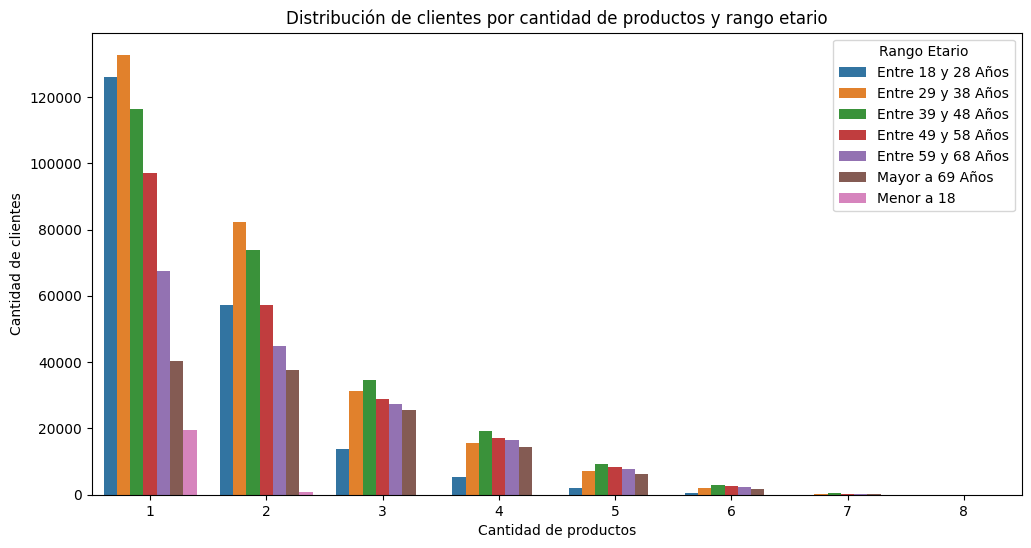

In [37]:
plt.figure(figsize=(12,6))
ax = sns.barplot(
    data=edad_producto,
    x='CANTIDAD_PRODUCTOS',
    y='Cantidad_Clientes',
    hue='Rango_Edad_Nuevo'
)

plt.title('Distribución de clientes por cantidad de productos y rango etario')
plt.xlabel('Cantidad de productos')
plt.ylabel('Cantidad de clientes')
plt.legend(title='Rango Etario')
plt.show()


**Repuesta H2** La hipótesis no se cumple de forma estricta. No es cierto que a mayor edad, más productos. Más bien, los clientes de mediana edad (aproximadamente 29 a 58 años) tienden a tener más productos, mientras que los clientes muy jóvenes o muy mayores tienen menos.

**¿Qué combinaciones de productos son más frecuentes por tipo de cliente?** H3: Los clientes con tarjeta de crédito suelen tener también caja de ahorro en pesos.

ANÁLISIS DE COMBINACIONES DE PRODUCTOS

📊 TOP 20 COMBINACIONES MÁS FRECUENTES:

Total de clientes analizados: 1257673
Combinaciones únicas encontradas: 48

--------------------------------------------------------------------------------
 1. CAJA_AHORRO + TJ_CREDITO                           | 852638 clientes (67.79%)
 2. CAJA_AHORRO + CAJA_AHORRO_USD + TJ_CREDITO         | 103289 clientes ( 8.21%)
 3. CAJA_AHORRO + PLAZOS_FIJOS + TJ_CREDITO            | 86033 clientes ( 6.84%)
 4. CAJA_AHORRO + SEGURO + TJ_CREDITO                  | 62337 clientes ( 4.96%)
 5. CAJA_AHORRO + CAJA_AHORRO_USD + SEGURO + TJ_CREDITO | 24121 clientes ( 1.92%)
 6. CAJA_AHORRO + CAJA_AHORRO_USD + PLAZOS_FIJOS + TJ_CREDITO | 21009 clientes ( 1.67%)
 7. CAJA_AHORRO + CAJA_AHORRO_USD + CTA_CTE + TJ_CREDITO | 18897 clientes ( 1.50%)
 8. CAJA_AHORRO + CTA_CTE + TJ_CREDITO                 | 16271 clientes ( 1.29%)
 9. CAJA_AHORRO + PLAZOS_FIJOS + SEGURO + TJ_CREDITO   | 15003 clientes ( 1.19%)
10. CAJA_AHORRO + CAJA

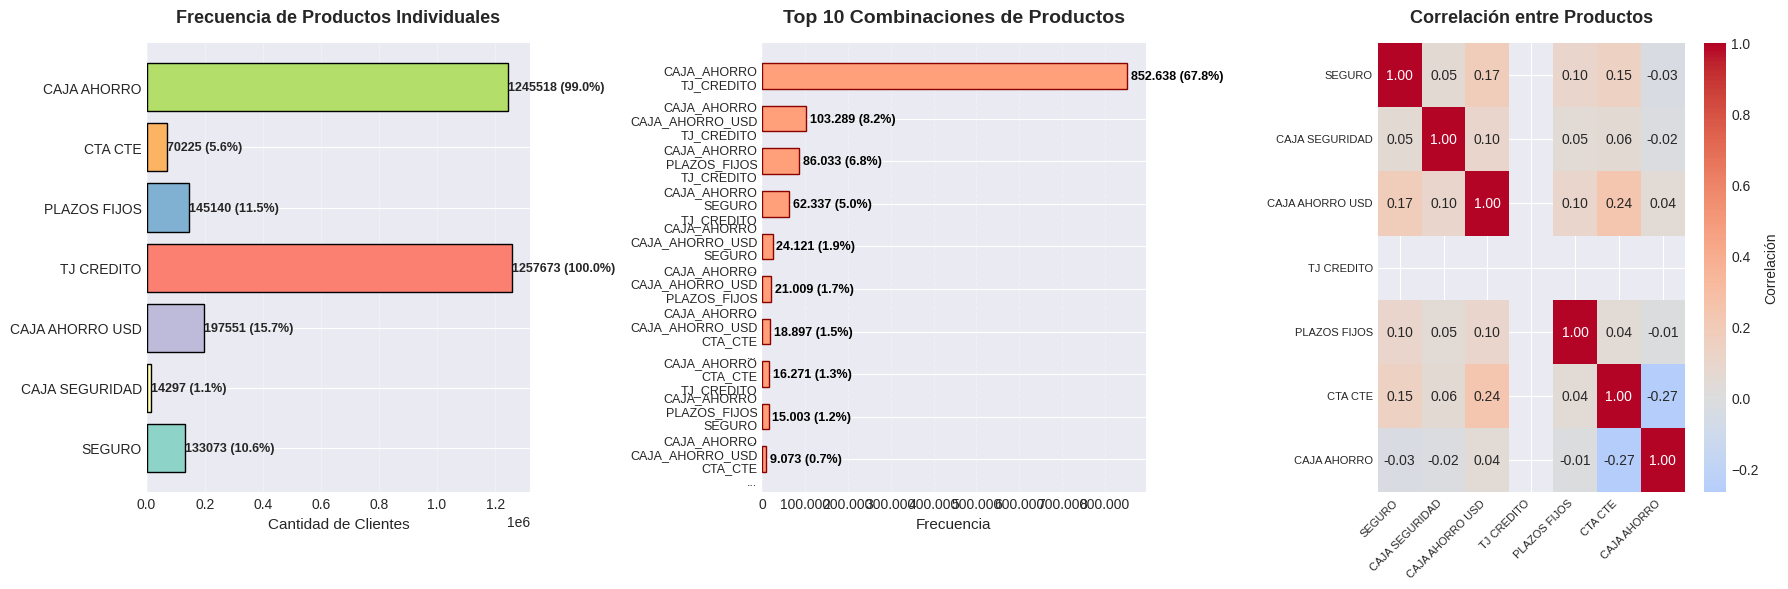



🔗 ANÁLISIS DE ASOCIACIÓN DE PRODUCTOS

Reglas de asociación (Si un cliente tiene el Producto A, 
¿qué probabilidad hay de que también tenga el Producto B?)
--------------------------------------------------------------------------------

Top 15 asociaciones más fuertes:

  • Si tiene SEGURO               → 100.0% tiene TJ_CREDITO           (133073 clientes)
  • Si tiene CAJA_AHORRO_USD      → 100.0% tiene TJ_CREDITO           (197551 clientes)
  • Si tiene CAJA_AHORRO_USD      → 100.0% tiene CAJA_AHORRO          (197551 clientes)
  • Si tiene CAJA_SEGURIDAD       → 100.0% tiene TJ_CREDITO           (14297 clientes)
  • Si tiene TJ_CREDITO           →  99.0% tiene CAJA_AHORRO          (1245518 clientes)
  • Si tiene PLAZOS_FIJOS         →  98.7% tiene CAJA_AHORRO          (143268 clientes)
  • Si tiene SEGURO               →  98.1% tiene CAJA_AHORRO          (130549 clientes)
  • Si tiene CAJA_SEGURIDAD       →  97.5% tiene CAJA_AHORRO          (13941 clientes)
  • Si tiene CTA_CTE   

In [39]:

from itertools import combinations
from collections import Counter


# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")


# IDENTIFICAR PRODUCTOS (COLUMNAS BOOLEANAS)
productos_cols = ['SEGURO', 'CAJA_SEGURIDAD', 'CAJA_AHORRO_USD',
                  'TJ_CREDITO', 'PLAZOS_FIJOS', 'CTA_CTE', 'CAJA_AHORRO']


# CREAR COMBINACIONES DE PRODUCTOS

def obtener_productos_cliente(row):
    """Retorna lista de productos que tiene un cliente"""
    productos = []
    for col in productos_cols:
        if row[col] == 'Si':
            productos.append(col)
    return tuple(sorted(productos))

# Aplicar función para obtener combinaciones
df['Combinacion_Productos'] = df.apply(obtener_productos_cliente, axis=1)
df['Num_Productos'] = df['Combinacion_Productos'].apply(len)

print("=" * 80)
print("ANÁLISIS DE COMBINACIONES DE PRODUCTOS")
print("=" * 80)


# TOP COMBINACIONES GENERALES
print("\n📊 TOP 20 COMBINACIONES MÁS FRECUENTES:\n")

combinaciones_generales = df['Combinacion_Productos'].value_counts().head(20)

print(f"Total de clientes analizados: {len(df)}")
print(f"Combinaciones únicas encontradas: {df['Combinacion_Productos'].nunique()}")
print("\n" + "-" * 80)

for i, (combo, freq) in enumerate(combinaciones_generales.items(), 1):
    porcentaje = (freq / len(df)) * 100
    if combo:
        productos_str = ' + '.join(combo)
    else:
        productos_str = 'Sin productos'
    print(f"{i:2d}. {productos_str:<50} | {freq:5d} clientes ({porcentaje:5.2f}%)")



# Estadísticas generales
print("\n" + "-" * 80)
print(f"Promedio de productos por cliente: {df['Num_Productos'].mean():.2f}")
print(f"Mediana de productos por cliente: {df['Num_Productos'].median():.0f}")
print(f"Mínimo de productos: {df['Num_Productos'].min():.0f}")
print(f"Máximo de productos: {df['Num_Productos'].max():.0f}")


# VISUALIZACIONES


fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Subplot 1: Frecuencia de productos individuales
ax1 = axes[0]
productos_freq = [(df[prod] == 'Si').sum() for prod in productos_cols]
productos_names = [prod.replace('_', ' ') for prod in productos_cols]
colors = plt.cm.Set3(range(len(productos_cols)))
ax1.barh(productos_names, productos_freq, color=colors, edgecolor='black')
ax1.set_title('Frecuencia de Productos Individuales',
              fontsize=13, fontweight='bold', pad=15)
ax1.set_xlabel('Cantidad de Clientes', fontsize=11)
ax1.grid(axis='x', alpha=0.3)
for i, v in enumerate(productos_freq):
    ax1.text(v + 20, i, f'{v} ({v/len(df)*100:.1f}%)',
             va='center', fontsize=9, fontweight='bold')

from matplotlib.ticker import FuncFormatter

# Subplot 2: Top 10 combinaciones ---
ax2 = axes[1]
top_combos = df['Combinacion_Productos'].value_counts().head(10)


combo_labels = []
for c in top_combos.index:
    if c:

        if isinstance(c, (list, tuple)):
            if len(c) <= 3:
                label = '\n'.join(c)
            else:
                label = '\n'.join(c[:3]) + '\n...'
        else:
            label = str(c)
    else:
        label = 'Sin productos'
    combo_labels.append(label)

y_pos = range(len(top_combos))

ax2.barh(y_pos, top_combos.values,
         color='#FFA07A',
         edgecolor='darkred',
         height=0.6)

ax2.set_yticks(y_pos)
ax2.set_yticklabels(combo_labels, fontsize=9)
ax2.invert_yaxis()


ax2.set_title('Top 10 Combinaciones de Productos', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Frecuencia', fontsize=11)

# --- Grid + separador de miles en eje X ---
formatter = FuncFormatter(lambda x, p: format(int(x), ',').replace(',', '.'))
ax2.xaxis.set_major_formatter(formatter)
ax2.grid(axis='x', alpha=0.3, linestyle='--')

total = len(df)
for i, v in enumerate(top_combos.values):
    ax2.text(v + (max(top_combos.values)*0.01), i,
             f'{v:,} ({v/total*100:.1f}%)'.replace(',', '.'),
             va='center', fontsize=9, fontweight='bold', color='black')

plt.tight_layout()

# Subplot 3: Matriz de correlación de productos
ax3 = axes[2]
# Crear matriz binaria
productos_matrix = pd.DataFrame()
for prod in productos_cols:
    productos_matrix[prod] = (df[prod] == 'Si').astype(int)

# Calcular correlación
corr_matrix = productos_matrix.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, ax=ax3, cbar_kws={'label': 'Correlación'},
            xticklabels=[p.replace('_', ' ') for p in productos_cols],
            yticklabels=[p.replace('_', ' ') for p in productos_cols])
ax3.set_title('Correlación entre Productos',
              fontsize=13, fontweight='bold', pad=15)
plt.setp(ax3.get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.setp(ax3.get_yticklabels(), rotation=0, fontsize=8)

plt.tight_layout()
plt.savefig('analisis_combinaciones_productos.png', dpi=300, bbox_inches='tight')
plt.show()


# ANÁLISIS DE ASOCIACIÓN (REGLAS SIMPLES)

print("\n\n" + "=" * 80)
print("🔗 ANÁLISIS DE ASOCIACIÓN DE PRODUCTOS")
print("=" * 80)
print("\nReglas de asociación (Si un cliente tiene el Producto A, ")
print("¿qué probabilidad hay de que también tenga el Producto B?)")
print("-" * 80)

asociaciones = []

for i, prod1 in enumerate(productos_cols):
    tiene_prod1 = (df[prod1] == 'Si').sum()

    if tiene_prod1 > 0:
        for prod2 in productos_cols[i+1:]:
            tiene_ambos = ((df[prod1] == 'Si') & (df[prod2] == 'Si')).sum()
            prob_condicional = (tiene_ambos / tiene_prod1) * 100

            asociaciones.append({
                'Producto_Base': prod1,
                'Producto_Asociado': prod2,
                'Probabilidad': prob_condicional,
                'Frecuencia': tiene_ambos
            })

# Ordenar por probabilidad
asociaciones_df = pd.DataFrame(asociaciones).sort_values('Probabilidad', ascending=False)

# Mostrar las 15 asociaciones más fuertes
print("\nTop 15 asociaciones más fuertes:\n")
for idx, row in asociaciones_df.head(15).iterrows():
    print(f"  • Si tiene {row['Producto_Base']:<20} → {row['Probabilidad']:5.1f}% tiene {row['Producto_Asociado']:<20} ({row['Frecuencia']:.0f} clientes)")


# DataFrame con todas las combinaciones
df_resultados = df[['Combinacion_Productos', 'Num_Productos']].copy()
df_resultados['Productos_Lista'] = df_resultados['Combinacion_Productos'].apply(
    lambda x: ', '.join(x) if x else 'Sin productos')

# Tabla resumen de combinaciones
tabla_combinaciones = df['Combinacion_Productos'].value_counts().reset_index()
tabla_combinaciones.columns = ['Combinacion', 'Frecuencia']
tabla_combinaciones['Porcentaje'] = (tabla_combinaciones['Frecuencia'] / len(df) * 100).round(2)
tabla_combinaciones['Productos'] = tabla_combinaciones['Combinacion'].apply(
    lambda x: ', '.join(x) if x else 'Sin productos')


**H3: Los clientes con tarjeta de crédito suelen tener también caja de ahorro en pesos. ** La Hipotesis es correcta, y esa combinación de productos es la más representativa de toda la cartera

Otro analisis es la cantidad de productos contratados de acuerdo a la Cartera a la que pertenecen.

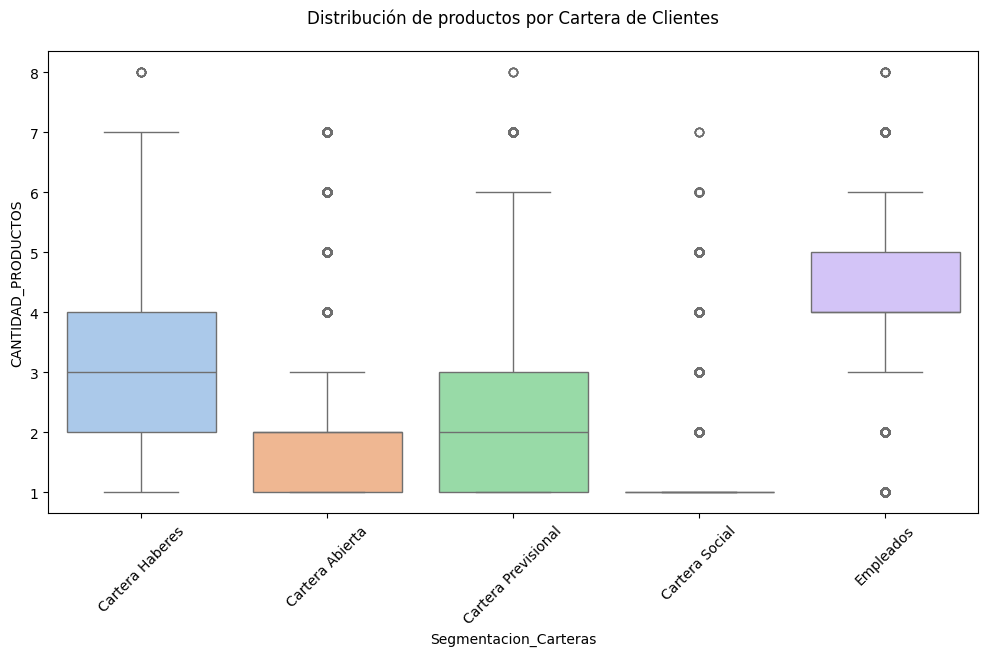

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Segmentacion_Carteras', y='CANTIDAD_PRODUCTOS' , hue='Segmentacion_Carteras', data=df, palette='pastel')
plt.title('Distribución de productos por Cartera de Clientes', pad=20)
plt.xticks(rotation=45)
plt.legend().set_visible(False)

plt.show()


↪ Con esta visualizacion podemos interpretar que:
La Cartera Haberes tiene una mediana de 3 productos.
La mayoría de los clientes tienen entre 2 y 4 productos. Y hay algunos outliers que compran hasta 7-8 productos.
Cartera Abierta tiene una mediana igual a 1 producto. La distribución es más concentrada; la mayoría tienen 1-2 productos. Algunos clientes compran hasta 6 productos, serian outliers.
Por otro lado, la Cartera Previsional con una mediana de 2 productos. Un Rango intercuartílico de 1 a 3 productos, y varios outliers hasta 6-7 productos.
La Cartera Social logicamente tiene una mediana de 1 producto y outliers hasta 7 productos, casos a revisar.
Los Empleados de la entidad se les ofrece los paquetes completos por eso la Mediana ≈ 4 productos, y un rango intercuartílico: 4 a 5 productos.

**DIGITALIZACION DE CLIENTES**
¿Qué proporción de clientes utiliza canales digitales y cómo varía según grupo etario?

H4: Los clientes jóvenes presentan mayor adopción de canales digitales que los mayores.

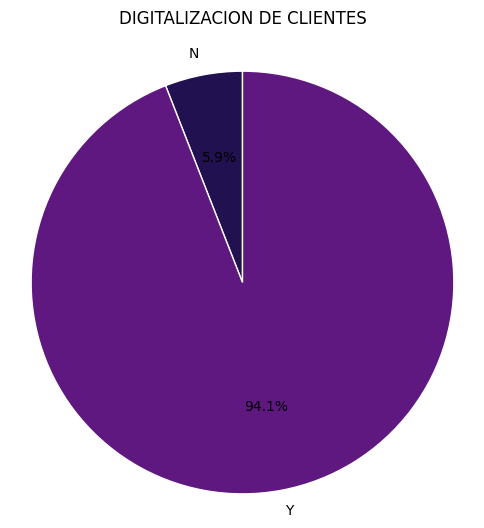

In [ ]:
colors = sns.color_palette('magma')
df_genero = df.groupby('IND_DIGITAL')['CANTIDAD_CLIENTES'].sum()
plt.figure(figsize=(6,6))
plt.pie(
    df_genero,
    labels=df_genero.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'w'}
)
plt.title("DIGITALIZACION DE CLIENTES", pad=20)
plt.axis('equal')

plt.show()


El 94% de los clientes utiliza un canal digital para operar con el banco.

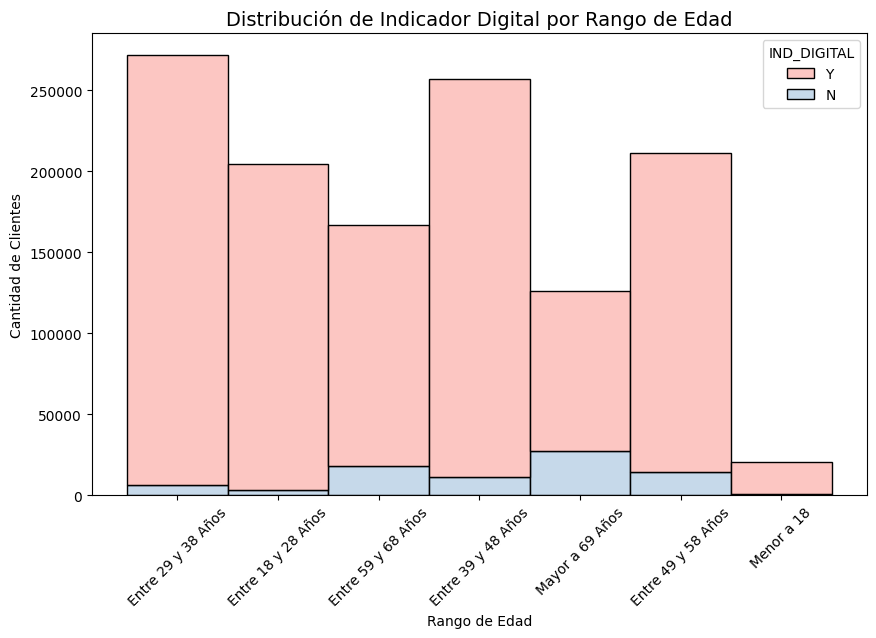

In [ ]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Rango_Edad_Nuevo', hue='IND_DIGITAL', multiple='stack', palette='Pastel1')

plt.title('Distribución de Indicador Digital por Rango de Edad', fontsize=14)
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Clientes')
plt.xticks(rotation=45)
plt.show()


**Respuesta H4** ¿Los clientes jóvenes presentan mayor adopción de canales digitales que los mayores?  Esta visualizacion demuestra que la hipotesis es correcta.  los clientes jovenes son los que mayor proporcion de digitalizacion tienen.

¿Existe relación entre la digitalización y la cantidad de productos contratados?

H5: A mayor adopción digital, mayor contratación de productos.